# Data Visualisation with Python

Data visualisation should produce graphs that are simple, clean and with few distractions, making the information easy to read and follow.

## Matplotlib Library

This is a python library that is well-established for data visualisation.

It is formed of 3 layers:
- Backend Layer:
    1. FigureCanvas: refers to the are where the figure will be drawn
    2. Renderer: does the drawing
    3. Event: interprets users inputs like keyboard and mouse clicks
- Artist Layer: Composed of the Artist which knows how to use 'Renderer'
    1. Primitive type: lines, circles, text
    2. Composite type: axis, ticks, figure. May contain other 'composite types' or even 'priitive types'
- Scripting Layer: comprised mainly of 'pyplot' (easier scripting interface)

### Basic Plotting

First, we need to import the library:

In [1]:
import matplotlib as mpl
print("matplotlib version:",mpl.__version__)

matplotlib version: 3.1.3


Note: there are two underscores before and after 'version'.

#### Plot Function

Let's start with importing the scripting interface from inside the library matplotlib:

In [2]:
import matplotlib.pyplot as plt

Now let's make the most basic of plots:

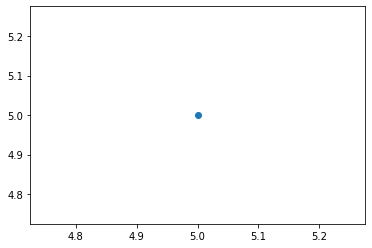

In [5]:
plt.plot(5,5,'o')
plt.show()

When using Jupyter Notebooks, there are a number of ways that we can produce a graph:
- `plt.show()` produces the graph under the input
- `%matplotlib inline` produces the graph as an output which cannot be changed
- `%matplotlib notebook` produces the graph as an output to which we can constantly add new features

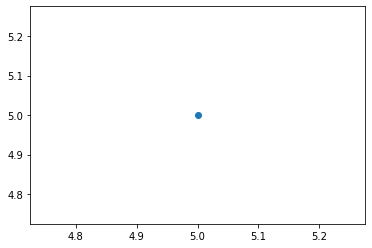

In [7]:
%matplotlib inline
plt.plot(5,5,'o')

In [3]:
%matplotlib notebook
plt.plot(5,5,'o')

<IPython.core.display.Javascript object>

Note: this does not seem to work at the moment on Jupyter Notebooks.

Pandas has an in-built implementation of the matplotlib, so plotting in pandas is as trivial as just calling a plot. Eg. `MyData.plot(kind="line")` or `MyData.plot(kind="hist")`.

The dataset that we will start playing with will be imported from the UN website on immigration to Canada. We will work with a few different python libraries, each of which will be useful for a specific thing.

In [11]:
from __future__ import print_function # adds compatibility to python 2
import numpy as np #useful for scientific computing
import pandas as pd #useful for data structure library

In [12]:
#install xlrd which is a library that is useful for extracting data from excel spreadsheets
!pip install xlrd
print('xlrd installed!')

xlrd installed!


When we open the excel spreadsheet from the website, we see that the top 20 lines of the file are extra information that are not useful for analysis. It is important that we remove these first 20 lines to keep just the action table section of the spreadsheet. Using *pandas*, let's import the table:

In [95]:
df_can=pd.read_excel('~/Documents/Cambridge/Python-Lessons/Canada.xlsx',
                     sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skip_footer=2) #last two rows have countries called "unknown" and "total", these were removed

In [96]:
df_can.head() #check if the table is as you wanted.

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [88]:
df_canada=pd.DataFrame(df_can)

#### Line plots

Series of data points that are connected by straight line segments.

To make a line plot we will need:
- library to plot: matplotlib
- scripting interface: pyplot
- clean/organised data

In [91]:
import matplotlib as mpl # library to plot
import matplotlib.pyplot as plt #scripting interface

In [99]:
#set name of rows to the country names
df_canada_indexed=df_canada.set_index('OdName')
df_canada_indexed.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


In [113]:
#create a new column with total immigration per country (row).

#sets name of new column, selects which columns to be aggregated using 'iloc', used method 'sum', 
#and specifies that this will appear at end of columns list
df_canada_indexed['Total']=df_canada_indexed.iloc[:,8:43].sum(axis=1) 
df_canada_indexed.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278.0
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,31398.0
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878.0
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,12.0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,30.0


We want to make the values that will be put on the x-axis, which is the years, into strings instead of numbers, for this we will transform the 

In [132]:
years=list(map(str,range(1980,2014))) # transforming years in a specific range into strings

df_canada_indexed.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
           
plt.show()

KeyError: "None of [Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',\n       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',\n       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',\n       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],\n      dtype='object')] are in the [index]"

In [133]:
type(years)

list

In [127]:
df_canada_indexed.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278.0
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,31398.0
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878.0
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,12.0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,30.0


In [135]:
years=list(range(1980,2014)) # transforming years in a specific range into strings

years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

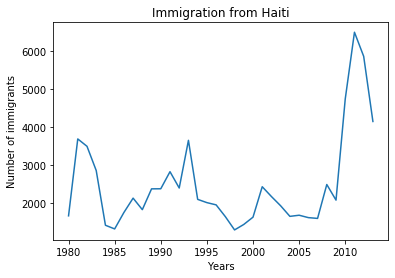

In [141]:
%matplotlib inline
df_canada_indexed.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
           
plt.show()

In [138]:
#### 